In [2]:
from google.colab import files
data = files.upload()
 


Saving Data_for_UCI_named.csv to Data_for_UCI_named.csv


In [3]:
import numpy as np
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(data['Data_for_UCI_named.csv']))
print(df)
df.head()

          tau1      tau2      tau3      tau4        p1        p2        p3  \
0     2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1     9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2     8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3     0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4     3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
...        ...       ...       ...       ...       ...       ...       ...   
9995  2.930406  9.487627  2.376523  6.187797  3.343416 -0.658054 -1.449106   
9996  3.392299  1.274827  2.954947  6.894759  4.349512 -1.663661 -0.952437   
9997  2.364034  2.842030  8.776391  1.008906  4.299976 -1.380719 -0.943884   
9998  9.631511  3.994398  2.757071  7.821347  2.514755 -0.966330 -0.649915   
9999  6.530527  6.781790  4.349695  8.673138  3.492807 -1.390285 -1.532193   

            p4        g1        g2        g3        g4      sta

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
#Check for NA
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [5]:
df_data = df.drop(columns=[ 'stab' ], inplace = False)
df_data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [6]:
X = df_data 
y = df[ 'stabf' ]
X
y

0       unstable
1         stable
2       unstable
3       unstable
4       unstable
          ...   
9995    unstable
9996      stable
9997      stable
9998    unstable
9999    unstable
Name: stabf, Length: 10000, dtype: object

In [7]:
#split the data into training and testing sets 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state= 1 ) 
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [8]:
#encode categorical variable 
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder() 
x_train.stabf = encoder.fit_transform(x_train.stabf) 
x_test.stabf = encoder.transform(x_test.stabf)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(x_train,y_train)
scaled_x_test = scaler.fit_transform(x_test)

In [29]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)
from sklearn import metrics
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [31]:
#extra trees classifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
etc =  ExtraTreesClassifier(n_estimators=100)
etc.fit(x_train,y_train)

y_pred=etc.predict(x_test)
from sklearn import metrics
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor( n_estimators=100, reg_lambda=1, gamma=0, max_depth=3)
xg_reg.fit(x_train, y_train)

preds = xg_reg.predict(x_test)

In [21]:
#lightgbm
import lightgbm as ltb
model = ltb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='logloss')


[20]	training's binary_logloss: 0.077352	training's binary_logloss: 0.077352	valid_0's binary_logloss: 0.0770111	valid_0's binary_logloss: 0.0770111
[40]	training's binary_logloss: 0.0123095	training's binary_logloss: 0.0123095	valid_0's binary_logloss: 0.0122573	valid_0's binary_logloss: 0.0122573
[60]	training's binary_logloss: 0.00202253	training's binary_logloss: 0.00202253	valid_0's binary_logloss: 0.00201401	valid_0's binary_logloss: 0.00201401
[80]	training's binary_logloss: 0.000333992	training's binary_logloss: 0.000333992	valid_0's binary_logloss: 0.000332586	valid_0's binary_logloss: 0.000332586
[100]	training's binary_logloss: 5.51995e-05	training's binary_logloss: 5.51995e-05	valid_0's binary_logloss: 5.49671e-05	valid_0's binary_logloss: 5.49671e-05


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [22]:
#Accuracy
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 1.0000
Testing accuracy 1.0000


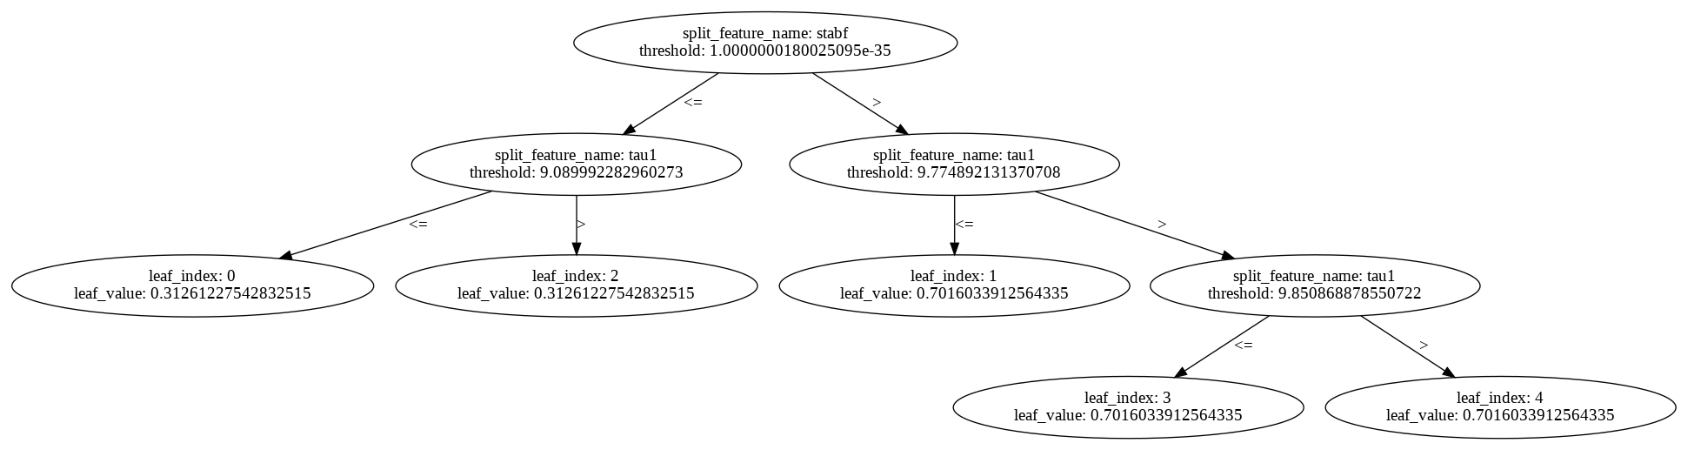

In [24]:
ltb.plot_tree(model,figsize=(30,40))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


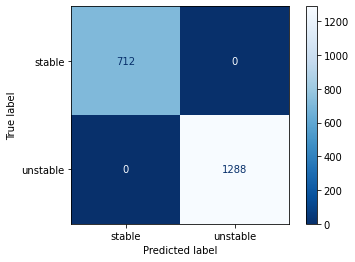

In [25]:
metrics.plot_confusion_matrix(model,x_test,y_test,cmap='Blues_r')

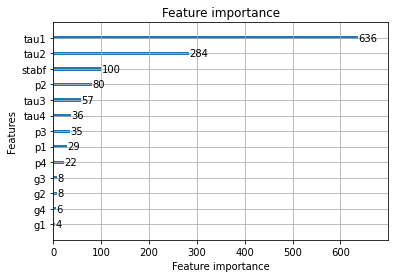

In [27]:
ltb.plot_importance(model)